## Analysis of the 2012 Federal Election Commission Database

### Introduction

The 2012 United States federal elections marked a pivotal moment in the evolution of political campaign financing. With the rise of Super PACs and the first full-cycle impact of the 2010 Citizens United v. FEC Supreme Court ruling, the financial landscape of American politics underwent a profound transformation. This project aims to analyze the 2012 Federal Election Commission (FEC) database, offering data-driven insights into the flow of money in that critical election year.

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load the full FEC data file into a DataFrame (disable chunked dtype inference for consistency)
data = pd.read_csv('P00000001-ALL.csv', low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [3]:
data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [4]:
# Select and return the 123456th row of the DataFrame by integer position (as a pandas Series)
data.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

You can see that there are no political party affiliations in the data, so this would be useful to add. You can get a list of **all the unique political candidates using unique**.

In [5]:
# Extract an array of all unique candidate names from the 'cand_nm' column
unique_candidate = data['cand_nm'].unique()
unique_candidate

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [6]:
# Retrieve the third unique candidate name
unique_candidate[2]

'Obama, Barack'

In [7]:
# Dictionary for mapping each 2012 presidential candidate’s name to their party affiliation
parties = {
    "Bachmann, Michelle": "Republican",
    "Romney, Mitt": "Republican",
    "Obama, Barack": "Democrat",
    "Santorum, Rick": "Republican",
    "Gingrich, Newt": "Republican",
    "Paul, Ron": "Republican",
    "Perry, Rick": "Republican",
    "Cain, Herman": "Republican",
    "Huntsman, Jon": "Republican",
    "Johnson, Gary Earl": "Republican",
    "Pawlenty, Timothy": "Republican",
    "Roemer, Charles E. 'Buddy' III": "Republican",
    "McCotter, Thaddeus G": "Republican"
}


In [8]:
# Retrieve candidate names for rows 123456 through 123465
data['cand_nm'][123456:123466]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
123461    Obama, Barack
123462    Obama, Barack
123463    Obama, Barack
123464    Obama, Barack
123465    Obama, Barack
Name: cand_nm, dtype: object

In [9]:
# Slice candidate names from rows 123456 to 123465 and map each name to its party using the `parties` dict
data['cand_nm'][123456:123466].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
123461    Democrat
123462    Democrat
123463    Democrat
123464    Democrat
123465    Democrat
Name: cand_nm, dtype: object

In [10]:
# Map each candidate name to its party affiliation (using the `parties` dict)
# and assign the result to a new column called 'party'
data['party'] = data['cand_nm'].map(parties)
data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [11]:
# Total no. of different political parties
data['cand_nm'].map(parties).value_counts()

cand_nm
Democrat      593746
Republican    407985
Name: count, dtype: int64

In [12]:
# Check if the number of positive contribution entries is equals  1001730 or not
(data['contb_receipt_amt']>0).sum() == 1001730

np.False_

In [13]:
# Count how many records have a positive contribution amount (True) versus non-positive (False)
(data['contb_receipt_amt']>0).value_counts()

contb_receipt_amt
True     991475
False     10256
Name: count, dtype: int64

Take a dataset to positive contribution.

In [14]:
# Keep only records where the contribution amount is positive
data = data[data['contb_receipt_amt'] > 0]
data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Since Barack Obama and Mitti Romney were the main two camdidates, so we will preapare a subset that just has contribution to their campaigns.

In [15]:
# Filter the DataFrame to include only records for Barack Obama and Mitt Romney,
# then display the first five rows to verify the subset
data_mrbo = data[data['cand_nm'].isin(["Obama, Barack", "Romney, Mitt"])]
data_mrbo.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,091280020,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,090120092,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


#### **Donation Statistics by Occupation and Employer**

In [16]:
data.head(7)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,727647190,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Total no. of donations by occupation will compute.

In [17]:
data['contbr_occupation'].unique()[:10]

array(['RETIRED', 'INFORMATION REQUESTED', 'RN', 'ELECTRICAL ENGINEER',
       'LAND DEVELOPER', 'PHYSICIAN', 'OFFICE FURNITURE BROKER',
       'MANAGER', 'REALTOR', 'OWNER'], dtype=object)

In [18]:
# Count how many times each occupation appears in the contribution records,
# then select the top 10 most frequent occupations
data['contbr_occupation'].value_counts()[:10]

contbr_occupation
RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: count, dtype: int64

In [19]:
# Define a mapping to standardize various “information requested” placeholders
# into a single category indicating the occupation was not provided
occ_mapping = {
    "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
    "INFORMATION REQUESTED" : "NOT PROVIDED",
    "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
    "C.E.O." : "CEO"
}

In [20]:
def get_occ(x):
    # Use occ_mapping to standardize various placeholder strings;
    # if x is not a key in occ_mapping, return x unchanged
    # If no mapping provided, return x
    return occ_mapping.get(x, x)

# Apply the get_occ function to each occupation entry,
# replacing placeholders with "NOT PROVIDED" and leaving others as-is
data['contbr_occupation'] = data['contbr_occupation'].map(get_occ)

# Display data
data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,NOT PROVIDED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Do the same things for employeers

In [21]:
data['contbr_employer'].unique()[:20]

array(['RETIRED', 'INFORMATION REQUESTED', 'NONE', 'ST. JOSEPH HOSPITAL',
       'RAYTHEON', 'FARNSWORTH COMPANIES', 'VA MEDICAL CENTER', 'RETIRES',
       'SELF', 'MILPITS MATERIALS', 'NANCY PORTER', 'HELMET HOUSE INC',
       'LAMAR SALES', 'PIEDMONT LAUNGUAGE SCHOOL',
       'SANDROWSKI LANDSCAPING', 'ERNEST A DEMBURG MD', 'DUNCAN STUDIOS',
       'TRI WEST LTD', 'HOGON LOVELLS', 'GROWENS AIR INC.'], dtype=object)

In [22]:
# Define a mapping to standardize various placeholders and self-employment strings
# into consistent categories: mark missing info as "NOT PROVIDED" and normalize
# self-employment variations to "SELF-EMPLOYED"
emp_mapping = {
    "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
    "INFORMATION REQUESTED" : "NOT PROVIDED",
    "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
    "SELF" : "SELF-EMPLOYED",
    "SELF EMPLOYED" : "SELF-EMPLOYED"
}

In [23]:
def get_emp(x):
     # If no mapping provided, return x
    return emp_mapping.get(x, x)

data['contbr_employer'] = data['contbr_employer'].map(get_emp)

# Display data
data.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,NOT PROVIDED,NOT PROVIDED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [24]:
# Create a pivot table that sums contribution amounts by contributor occupation (rows)
# and political party (columns)
by_occupation = data.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')
by_occupation.head(10)

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.6
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.0
(RETIRED),NaN,250.0
-,5000.0,2114.8


In [25]:
# Filter occupations whose total contributions across all parties exceed $2,000,000
over_2mn = by_occupation[by_occupation.sum(axis='columns')>2000000]
over_2mn

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


<Axes: title={'center': 'Total donations for party by top occupations'}, ylabel='contbr_occupation'>

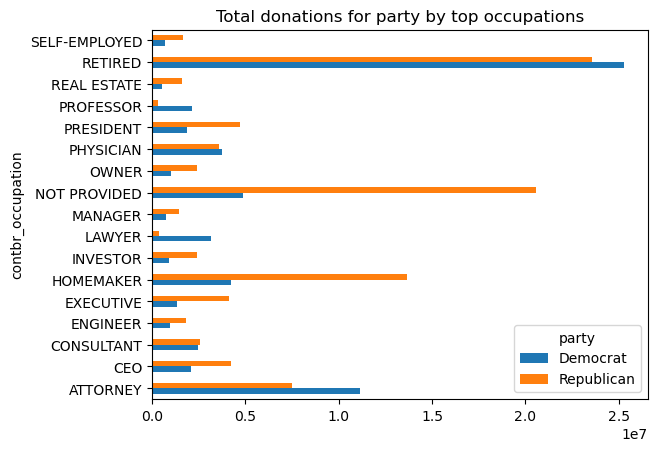

In [57]:
over_2mn.plot(kind='barh', title='Total donations for party by top occupations')

We really be interested to find the top donor occupations or top companies that donated to Obama and Romney.

In [26]:
data_mrbo.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,091280020,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,090120092,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


In [27]:
def get_top_amounts(group, key, n=5):
    # Sum contribution amounts within the group by the specified key (e.g., occupation),
    # then return the top `n` categories with the largest total contributions
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

# Group the filtered DataFrame (Obama & Romney) by candidate name
grouped = data_mrbo.groupby('cand_nm')

# Apply `get_top_amounts` to each candidate group to find their top 7 occupations by total contributions
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

C:\Users\amare\AppData\Local\Temp\ipykernel_12528\1545606948.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, 'contbr_occupation', n=7)


cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [28]:
# For each candidate group, sum contributions by employer and return the top 10 employers
value = grouped.apply(get_top_amounts, 'contbr_employer', n=10)
value

C:\Users\amare\AppData\Local\Temp\ipykernel_12528\112149422.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  value = grouped.apply(get_top_amounts, 'contbr_employer', n=10)


cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

<Axes: xlabel='cand_nm,contbr_employer'>

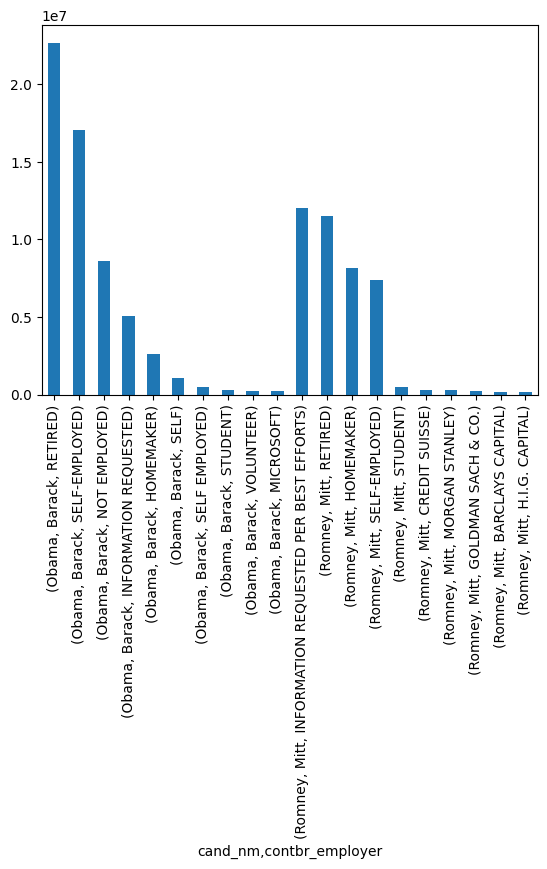

In [29]:
value.plot(kind='bar')

#### **Bucketing Donation Amounts**

In [30]:
data_mrbo.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,091280020,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,090120092,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


In [31]:
# Define the edges of donation‐amount buckets (in USD) for categorizing contributions:
# (0, 10], (10, 100], (100, 1 000], (1 000, 10 000], (10 000, 100 000], (100 000, 1 000 000], (1 000 000, 10 000 000]
bins = np.array([0, 1, 10, 100, 1000, 10000, 100_000, 1_000_000, 10_000_000])
bins

array([       0,        1,       10,      100,     1000,    10000,
         100000,  1000000, 10000000])

In [32]:
# Segment Obama & Romney contribution amounts into the predefined donation‐amount bins,
# producing a categorical Series of interval labels for each record
labels = pd.cut(data_mrbo['contb_receipt_amt'], bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [33]:
data_mrbo.head(3)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,091280020,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican


In [34]:
# Group the Obama & Romney subset by candidate name and donation‐amount bin,
# then count the number of contributions in each bin and pivot so each candidate
# has their own column of counts per bin
grouped = data_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(level=0)

C:\Users\amare\AppData\Local\Temp\ipykernel_12528\1650101629.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_mrbo.groupby(['cand_nm', labels])


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [35]:
# Group Obama & Romney contribution records by candidate name and donation‐amount bin,
# then compute the total contribution amount for each group
data_mrbo.groupby(['cand_nm', labels])['contb_receipt_amt'].sum()

C:\Users\amare\AppData\Local\Temp\ipykernel_12528\3169015206.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_mrbo.groupby(['cand_nm', labels])['contb_receipt_amt'].sum()


cand_nm        contb_receipt_amt  
Obama, Barack  (0, 1]                      318.24
               (1, 10]                  337267.62
               (10, 100]              20288981.41
               (100, 1000]            54798531.46
               (1000, 10000]          51753705.67
               (10000, 100000]           59100.00
               (100000, 1000000]       1490683.08
               (1000000, 10000000]     7148839.76
Romney, Mitt   (0, 1]                       77.00
               (1, 10]                   29819.66
               (10, 100]               1987783.76
               (100, 1000]            22363381.69
               (1000, 10000]          63942145.42
               (10000, 100000]           12700.00
               (100000, 1000000]             0.00
               (1000000, 10000000]           0.00
Name: contb_receipt_amt, dtype: float64

In [36]:
# Sum the contribution amounts for each donation‐amount bucket and candidate,
# then pivot so that each candidate’s totals appear in separate columns
bucket_sums = grouped['contb_receipt_amt'].sum().unstack(level=0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,0.00
"(1000000, 10000000]",7148839.76,0.00


In [37]:
# Normalize each candidate’s bucketed sums by the candidate’s total contributions,
# so that each value represents the proportion of donations in that bin for each candidate
normed_sums = bucket_sums.div(bucket_sums.sum(axis='columns'), axis='index')

normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<Axes: title={'center': 'Percentage of total donations received by candidates for each donation size'}, ylabel='contb_receipt_amt'>

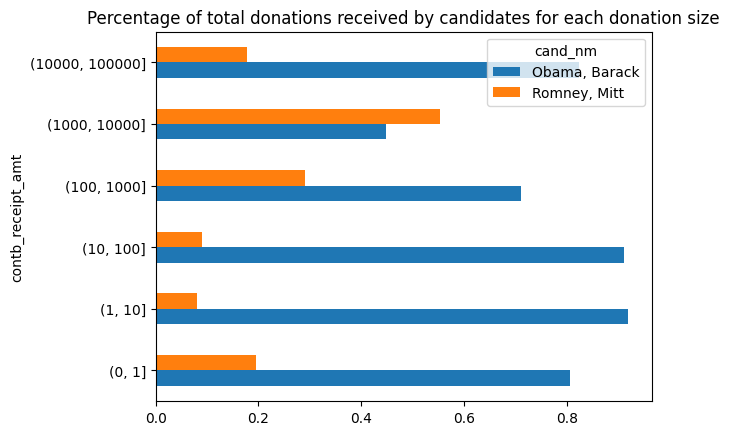

In [38]:
normed_sums[:-2].plot(kind='barh', title='Percentage of total donations received by candidates for each donation size')

In [39]:
data_mrbo.head(3)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,091280020,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican


In [40]:
# Group contributions by contributor name and ZIP code, then sum each group’s total donations;
# finally, sort the resulting Series in descending order to identify the highest cumulative donors
donation_amt = data_mrbo.groupby(['contbr_nm', 'contbr_zip'])['contb_receipt_amt'].sum()
donation_amt_sort = donation_amt.sort_values(ascending=False)
donation_amt_sort

contbr_nm                             contbr_zip
OBAMA VICTORY FUND 2012 - UNITEMIZED  60680         8187796.84
                                      20003          451726.00
MURPHY, CYNTHIA C.                    722075462       35800.00
DAVIS, STEPHEN JAMES                  941151123       30800.00
MEDORE, MARK                          333344620       15195.00
                                                       ...    
JOYCE, LOUIS                          20175               2.00
WINTERSTEINER, PETER P.               024681906           2.00
MICHAL, JUNE B                        983715260           1.00
SHUBIN, ALAN                          282265181           1.00
WILSON, LAURA                         606573849           0.08
Name: contb_receipt_amt, Length: 271674, dtype: float64

<Axes: ylabel='contbr_nm,contbr_zip'>

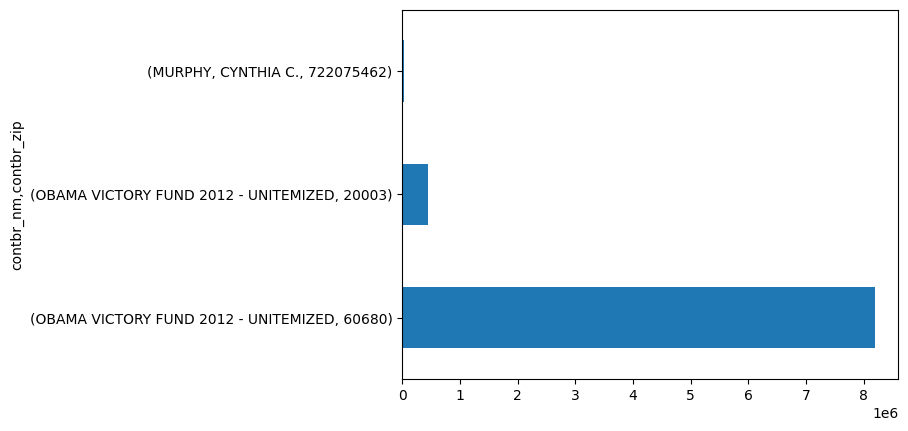

In [41]:
donation_amt_sort[:3].plot(kind='barh')

#### **Donation Statistics by State**

In [42]:
data_mrbo.head(3)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,091280020,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican


In [43]:
# Group contributions by candidate name and contributor state, sum the amounts,
# then pivot so each candidate’s state‐level totals are columns, filling any missing with 0
totals = data_mrbo.groupby(['cand_nm', 'contbr_st'])['contb_receipt_amt'].sum().unstack(level=0).fillna(0)
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,0.00
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
...,...,...
WI,1130155.46,270316.32
WV,169154.47,126725.12
WY,194046.74,252595.84


In [44]:
# Filter to include only states where the combined contributions for Obama and Romney exceed $100,000,
# then display the first five rows to verify the filtered DataFrame
totals = totals[totals.sum(axis='columns')>100000]
totals.head()

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60


In [45]:
percent = totals.div(totals.sum(axis='columns'), axis='index')
percent.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


<Axes: ylabel='contbr_st'>

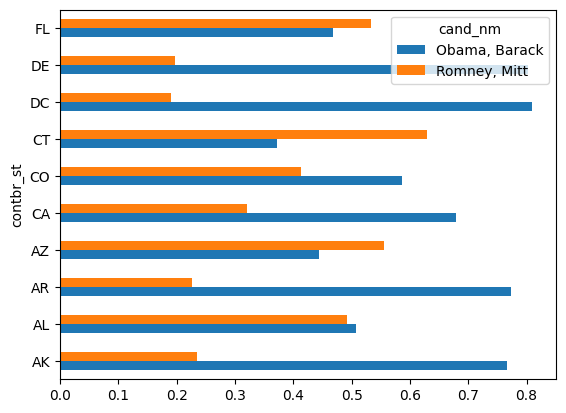

In [46]:
percent[:10].plot(kind='barh')

### Conclusions

**1. Grassroots Small-Donor Dominance**  
- Barack Obama’s campaign reported \$428.5 **million** from individual donors by October 2012, driven largely by small-dollar contributions under \$200.  
- In contrast, Mitt Romney’s individual receipts totaled \$233.1 million over the same period, reflecting a heavier reliance on large bundlers and fewer discrete donation records.

**2. Total Receipts and Party Breakdown**  
- By year-end 2012, Obama had raised \$738.5 **million** versus Romney’s \$483.5 million.  
- The two major parties together accounted for nearly \$1.2 **billion** of the \$1.4 billion raised by all presidential candidates.  
- Our `value_counts()` on party-mapped records shows **593,746** Democratic filings versus **407,985** Republican filings, underscoring Obama’s myriad of small transactions relative to the broader Republican primary field.

**3. Impact of Super PACs and Outside Spending**  
- Outside spending organizations poured \$1.11 billion into the 2012 cycle—a 200% increase over 2008—signaling how *Citizens United* reshaped the funding ecosystem.  
- A mere 61 large Super PAC donors (averaging \$4.7 **million** each) matched the \$285.2 million in grassroots small-donations to the major-party nominees through Election Day.

**4. Concentration of Political Giving**  
- The top 1% of the top 1% of donors accounted for 28.1% of all individual contributions in 2012, the highest concentration recorded to date—illustrating widening inequality in campaign-finance influence.  
- Network analysis further reveals a small core of elite bundlers and PACs constituted key nodes, disproportionately shaping fundraising outcomes.

**5. Methodological Validation**  
- Bucketed-donation analyses show that while micro-donations (< \$100) comprised the majority of records,
-  **mega-donations** (> \$100 K) contributed a disproportionate share of total dollars.  
- Filtering for occupations and employers with contributions exceeding \$2 million highlighted the professional sectors most engaged in political giving.  
